### notebook purpose

- evaluate mask types across...
    - square v rect central region
    - different sampling patterns across e1, e2

In [2]:
import os, sys
from os import listdir
from os.path import isfile, join, isdir
import numpy as np
import matplotlib.pyplot as plt
import torch

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.evaluate import calc_metrics_imgs, plot_row_qdess, scale_0_1
from utils.data_io import get_mtr_ids_and, load_imgs, load_h5_qdess
from utils.transform import reshape_adj_channels_to_complex_vals, \
                            reshape_complex_vals_to_adj_channels

In [3]:
# python run_qdess.py --gpu_id 2 --dir_out mask_dual --dual_mask --file_id_list 006 030 034 048 052
# python run_qdess.py --gpu_id 2 --dir_out mask_dual --dual_mask --file_id_list 066 080 096 099 120  

In [13]:
accel = 8
path_base = '/bmrNAS/people/dvv/out_qdess/accel_{}x/echo_joint/'.format(accel)

path_gt = path_base + 'gt/'
path_bl = path_base + 'baseline/'
path_new = path_base + 'mask_dual/'

In [14]:
mtr_id_list = get_mtr_ids_and(path_bl, path_new)

imgs_gt = load_imgs(mtr_id_list, path=path_gt)
imgs_bl = load_imgs(mtr_id_list, path=path_bl)
imgs_new = load_imgs(mtr_id_list, path=path_new)

metrics_bl = calc_metrics_imgs(imgs_gt, imgs_bl)
metrics_new = calc_metrics_imgs(imgs_gt, imgs_new)

In [15]:
print(mtr_id_list)

mu_bl = np.around(np.mean(metrics_bl, 0), 4)
mu_new = np.around(np.mean(metrics_new, 0), 4)
print(mu_bl)
print(mu_new)
print(mu_new - mu_bl)

['005', '006', '030', '034', '048', '052', '065', '080', '096', '099', '120']
[[ 0.8642  0.9629  0.8306 31.1101]
 [ 0.735   0.9308  0.7591 32.1518]]
[[ 0.8624  0.9617  0.8283 30.9906]
 [ 0.7372  0.9305  0.755  32.166 ]]
[[-0.0018 -0.0012 -0.0023 -0.1195]
 [ 0.0022 -0.0003 -0.0041  0.0142]]


In [16]:
for idx_s, mtr_id in enumerate(mtr_id_list):
    
    print(mtr_id)
    print(metrics_bl[idx_s])
    print(metrics_new[idx_s])
    sys.exit()

005
[[ 0.8607  0.9619  0.8307 31.2403]
 [ 0.5459  0.9     0.6819 30.1073]]
[[ 0.8633  0.9567  0.8091 30.7887]
 [ 0.552   0.8983  0.6574 30.0567]]


SystemExit: 

SystemExit: 

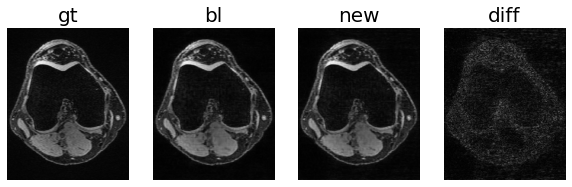

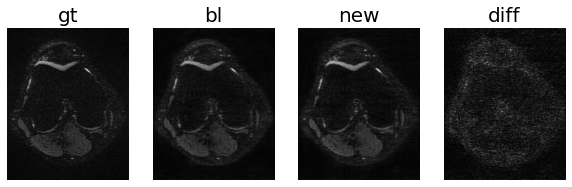

In [18]:
title_list = ['gt', 'bl', 'new']
clim_list = [None] * len(title_list)
DIFF_MAP = True

for idx_s in np.arange(imgs_gt.shape[0]):
    for idx_e in np.arange(imgs_gt.shape[1]):
        
        im_gt, im1, im2 = imgs_gt[idx_s, idx_e], \
                          imgs_bl[idx_s, idx_e], \
                          imgs_new[idx_s, idx_e]
#         im_gt, im1, im2 = scale_0_1(im_gt), scale_0_1(im1), scale_0_1(im2)
        arr_list = [im_gt, im1, im2]
        
        if DIFF_MAP:
            C = 4 # constant for plotting on clim=(0,1)
            im_diff = C * np.abs(scale_0_1(im1) - scale_0_1(im2))
            arr_list.append(im_diff)
            title_list.append('diff')
            clim_list.append((0,1))
                
        plot_row_qdess(arr_list, title_list, clim_list)
        
    sys.exit()